# Diabetes-multiple-regression

Demonstration of the scikit-learn multiple regression tools uisng data on people with diabetes.

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# Import the dataset
data = pd.read_csv("diabetes_dirty.csv")
data.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,PROGRESSION
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


## Identifying variables
### Independent variable
The independent variable in this investigation is the person's progression of the disease. 
### Dependent variables
The dependednt variables are the things that can effect the person's progression. They are:
- Age
- Sex
- Body mass index (BMI)
- Blood pressure (BP)

However, since sex is not a continuous variable, it is not suitable for linear regression and we will not include it in this investigation.
The dependent variables we will investigate are: 
- Age
- Body mass index (BMI)
- Blood pressure (BP)

In [3]:
# Select variables
# y = independent variable
# X = dependent variables

y = data.iloc[:,-1].values
X = data.iloc[:,[0,2,3]].values

## Training and test data
Create training and test sets with a 80% : 20% split.

In [4]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


print ("Training data:",X_train.shape, y_train.shape)
print ("Test data:",X_test.shape, y_test.shape)

Training data: (353, 3) (353,)
Test data: (89, 3) (89,)


## Scaling
Investigate the need for scaling by plotting pairwise relationships in a dataset.

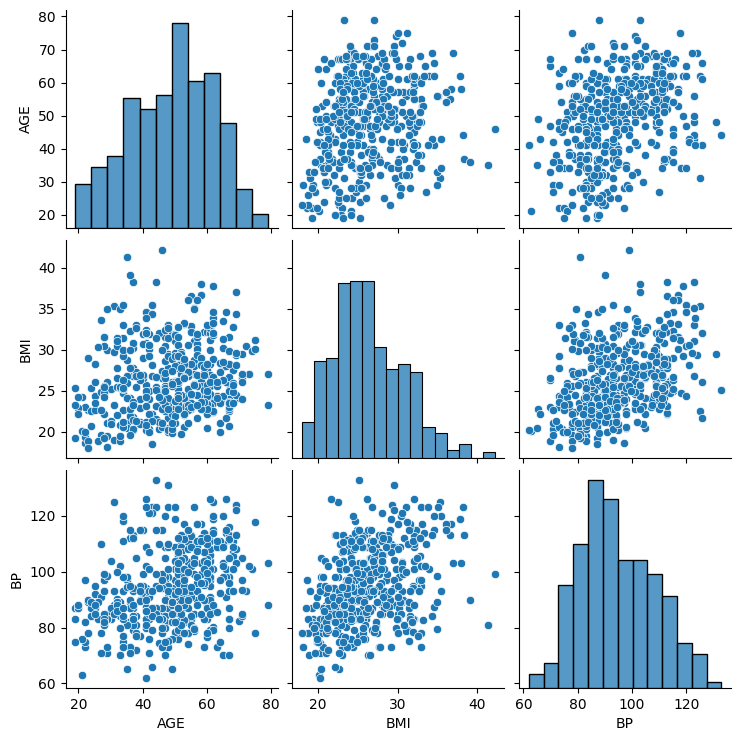

In [5]:
# Plot the distribution of the data
sns.pairplot(data=data.iloc[:,[0,2,3]])

From the plots above, we can see that the data is normally distributed. Therefore, we will standardize the data using StandardScaler.

In [6]:
# Fit the scaler on train data
scalar = StandardScaler()
scalar.fit(X_train)

# Apply the scaler on train and test data
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

## Multiple regression model

Apply the multiple regression model on the data

In [7]:
# Apply the linear regression model and print coefficents
progression_model = LinearRegression()
progression_model.fit(X_train,y_train)


print('Intercept: \n', progression_model.intercept_)
print('Coefficients: \n', progression_model.coef_)

Intercept: 
 152.35127478753535
Coefficients: 
 [ 2.51779677 38.76107383 17.68470341]


In [8]:
# Generate predictions
y_predictions = progression_model.predict(X_test)

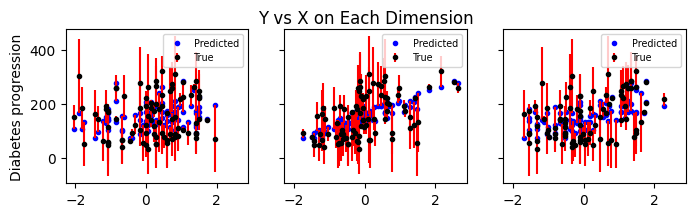

In [9]:
# Plot training and test data on the same axies. 
fig, ax = plt.subplots(1, X_test.shape[1], sharey=True, sharex=True, figsize=(8,2))
fig.suptitle("Y vs X on Each Dimension")
ax[0].set_ylabel('Diabetes progression')

# Get values for the error bar
error_bar_values = np.abs((y_test-y_predictions))

# Plot data, predicted values, and error bars
for i in range(X_test.shape[1]):
    ax[i].errorbar(X_test[:, i], y_test, yerr=error_bar_values, fmt='.k', ecolor='red', label='True')
    ax[i].scatter(X_test[:,i], y_predictions, c='b', marker='.', label='Predicted')
    ax[i].legend(loc='best', fontsize='x-small')


In [10]:
# R squared score
print ("R2 Score:", round (progression_model.score(X_test, y_test), 4))

R2 Score: 0.3113


The R2 value for this data is fairly low. Ths means that there is not a strong linear relationship between the independent variables and the dependent variable.